In [3]:
import ccxt
import pandas as pd
import pandas_ta as ta
import matplotlib.pyplot as plt
import math
import time

In [40]:
binance = ccxt.binanceusdm()
# symbol = 'BTCUSDT'
# timeframe = '1D'
binance.load_markets()
ohlcv = binance.fetch_ohlcv('ETH/USDT', '1d')
ccxt_df = pd.DataFrame(ohlcv, columns=['time', 'open', 'high', 'low', 'close', 'volume'])

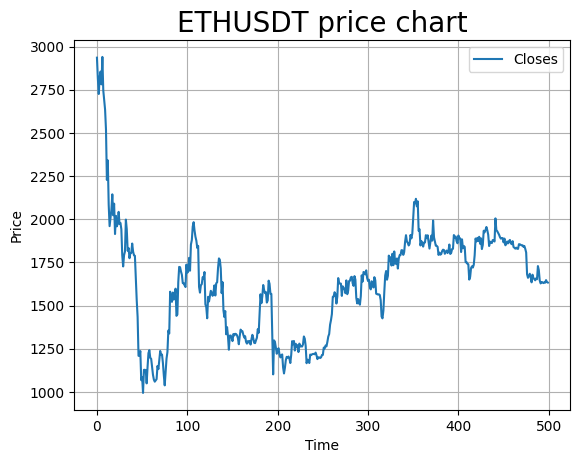

In [41]:
#Plot
plt.tick_params(axis = 'both', labelsize = 10)
ccxt_df['close'].plot(label = 'Closes')  
plt.xlabel("Time")
plt.ylabel("Price")
plt.title('ETHUSDT price chart', fontsize = 20)
plt.legend()
plt.grid()
plt.show()

In [25]:
#order book
binance_book = binance.fetch_order_book('ETH/USDT')
bid = binance_book['bids'][0][0]
ask = binance_book['asks'][0][0]
print("the best bid: {0} and the best ask: {1}".format(bid,ask))
spread = ask-bid
spread = round(spread,3)
print("The spread on the asset is: {0}".format(spread))

print(binance.fetch_ticker('BTC/USDT')['info']['lastPrice'])

the best bid: 1632.76 and the best ask: 1632.77
The spread on the asset is: 0.01
25854.20


In [38]:
def round_decimals_down(number:float, decimals:int=2):
    """
    Returns a value rounded down to a specific number of decimal places.
    """
    if not isinstance(decimals, int):
        raise TypeError("decimal places must be an integer")
    elif decimals < 0:
        raise ValueError("decimal places has to be 0 or more")
    elif decimals == 0:
        return math.floor(number)

    factor = 10 ** decimals
    return math.floor(number * factor) / factor

dollar_value = 100
symbol = 'ETH/USDT'
price = binance.fetch_ticker(symbol)['info']['lastPrice']
price = float(price)
pos_size_value = dollar_value/price
pos_size_value_rounded = round_decimals_down(pos_size_value,3)
print(pos_size_value_rounded)


0.061


In [52]:
symbol = 'ETH/USDT'
price = binance.fetch_ticker(symbol)
data = pd.DataFrame(price)

market = binance.market(symbol)
# print(market['symbol'], 'min size in asset:', 
print(market['limits']['market'])

{'min': 0.001, 'max': 2000.0}


In [34]:
#market buy
pos_size = pos_size_value_rounded

params = {'timeInForce': 'PostOnly',}
binance.create_market_buy_order(symbol, pos_size)
time.sleep(3)
binance.create_market_sell_order(symbol,pos_size)


0.061
